In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [156]:
file_path = './energy_demand_hourly_brazil.csv'
data = pd.read_csv(file_path)
data.head()

,index,hourly_demand
0,2000-01-01 00:00:00,34673.9
1,2000-01-01 01:00:00,33503.0
2,2000-01-01 02:00:00,32287.6
3,2000-01-01 03:00:00,31059.4
4,2000-01-01 04:00:00,30272.7


In [157]:
data.shape

(201318, 2)

In [158]:
# Verificando se há dados faltantes na tabela
missing_data = data.isnull().any().any()
missing_data

np.False_

In [159]:
# Converter a coluna 'index' para datetime
data['index'] = pd.to_datetime(data['index'])

# Criar uma coluna com apenas a data
data['date'] = data['index'].dt.date

print(data['date'] )

0         2000-01-01
1         2000-01-01
2         2000-01-01
3         2000-01-01
4         2000-01-01
             ...    
201313    2022-12-31
201314    2022-12-31
201315    2022-12-31
201316    2022-12-31
201317    2023-01-01
Name: date, Length: 201318, dtype: object


In [160]:
# Agrupar pela data e calcular a média de consumo diário
daily_mean = data.groupby('date', as_index=False)['hourly_demand'].mean()

# Renomear as colunas para clareza
daily_mean.rename(columns={'hourly_demand': 'daily_mean_demand'}, inplace=True)

# Exibir as primeiras linhas da nova tabela
daily_mean.head()

,date,daily_mean_demand
0,2000-01-01,30736.529167
1,2000-01-02,31453.354167
2,2000-01-03,37466.737500
3,2000-01-04,39149.970833
4,2000-01-05,39961.879167


In [161]:
daily_mean.shape

(8390, 2)

In [162]:
daily_mean.describe()

,daily_mean_demand
count,8390.000000
mean,54391.427986
std,10573.108669
min,26656.475000
25%,45713.935729
50%,54508.873720
75%,62564.159125
max,80438.151750


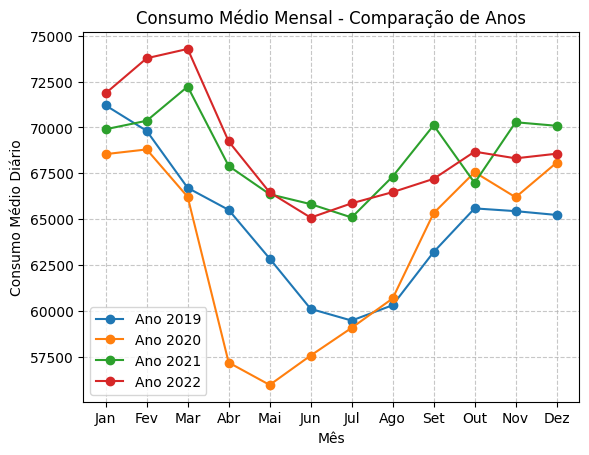

In [163]:
years = [2019, 2020, 2021, 2022]  # Substitua pelos anos que deseja comparar
for year in years:
    year_data = monthly_mean[monthly_mean['year'] == year]
    plt.plot(year_data['month'], year_data['daily_mean_demand'], marker='o', label=f'Ano {year}')

plt.title('Consumo Médio Mensal - Comparação de Anos')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

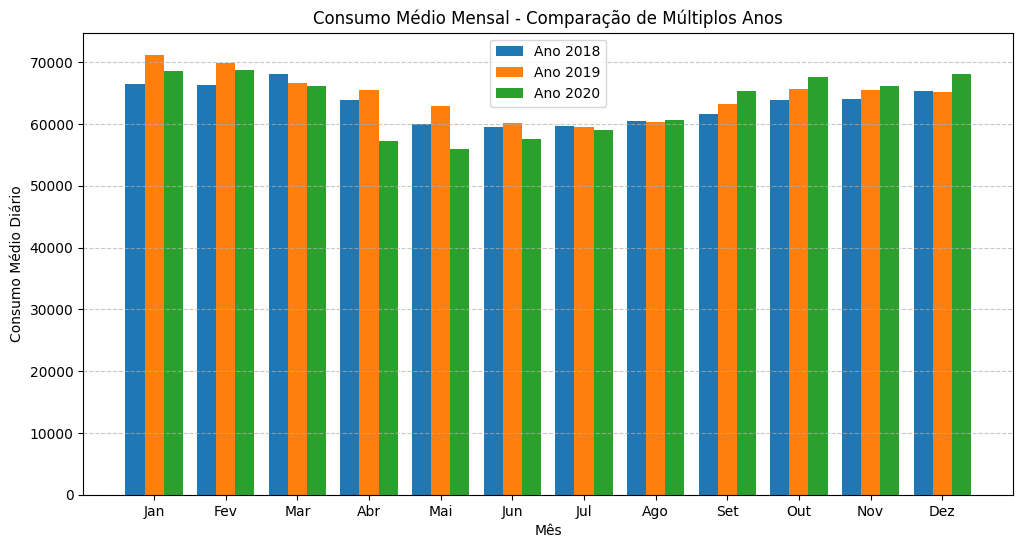

In [164]:
# Lista dos anos a serem comparados
years = [2018, 2019, 2020]  # Adicione os anos desejados aqui

# Dados para os anos selecionados
filtered_data = monthly_mean[monthly_mean['year'].isin(years)]

# Configurar os dados para o gráfico
bar_width = 0.8 / len(years)  # Ajustar a largura das barras com base no número de anos
x = np.arange(1, 13)  # Meses (1 a 12)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for i, year in enumerate(years):
    year_data = filtered_data[filtered_data['year'] == year]
    plt.bar(x + i * bar_width, year_data['daily_mean_demand'], width=bar_width, label=f'Ano {year}')

# Configurar o gráfico
plt.title('Consumo Médio Mensal - Comparação de Múltiplos Anos')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio Diário')
plt.xticks(x + (bar_width * (len(years) - 1)) / 2, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


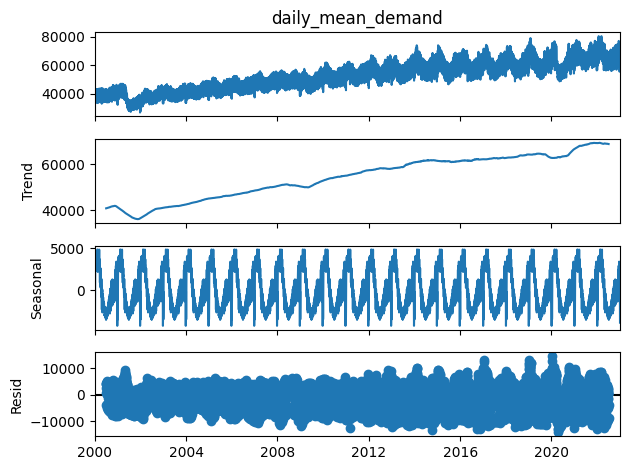

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Certifique-se de que os dados estejam ordenados e no formato datetime
daily_mean.set_index('date', inplace=True)

# Decompor uma série temporal (exemplo: dados de 2018)
result = seasonal_decompose(daily_mean['daily_mean_demand'], model='additive', period=365)
result.plot()
plt.show()


In [166]:
# Recriar daily_mean a partir dos dados originais
data['index'] = pd.to_datetime(data['index'])  # Garantir que está no formato datetime
data['date'] = data['index'].dt.date  # Criar uma coluna com apenas as datas

# Calcular a média diária
daily_mean = data.groupby('date', as_index=False)['hourly_demand'].mean()
daily_mean.rename(columns={'hourly_demand': 'daily_mean_demand'}, inplace=True)

# Garantir que 'date' está no formato datetime
daily_mean['date'] = pd.to_datetime(daily_mean['date'])

# Calcular o consumo total por ano
annual_consumption = daily_mean.groupby(daily_mean['date'].dt.year)['daily_mean_demand'].sum()

# Calcular a taxa de crescimento anual
annual_growth = annual_consumption.pct_change() * 100  # Converte para percentual


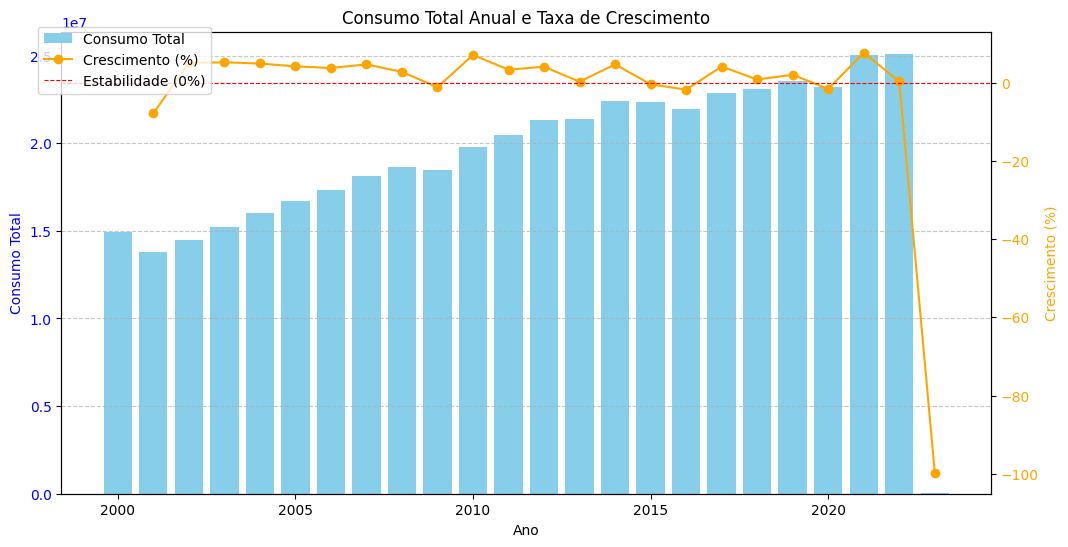

In [167]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o consumo total anual
ax1.bar(annual_consumption.index, annual_consumption.values, color='skyblue', label='Consumo Total')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo Total', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar o eixo secundário para a taxa de crescimento
ax2 = ax1.twinx()
ax2.plot(annual_growth.index, annual_growth.values, color='orange', marker='o', label='Crescimento (%)')
ax2.set_ylabel('Crescimento (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Estabilidade (0%)')

# Adicionar título e legendas
plt.title('Consumo Total Anual e Taxa de Crescimento')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()
